Project name：
# Crime In Chicago

Group member:

Adrian Aguada (aaguad3@uic.edu) Github: aaguad3

Xuhui Wu (xwu83@uic.edu) Github: xwu83

Aditya Guda (aguda4@uic.edu) Github: aguda4

Group Github: https://github.com/CS418/group-project-data-cyclists


# Project Introduction:

We are analyzing Chicago crime data to correlate them with certain attributes or patterns.

We feel this is important because of the national perception of the city being seen as a “dangerous, crime filled” city.

We want to confirm if this notion is true, true in a different light, or completely false.

We collectively decided upon this question because UIC’s location is relevant to the question here.

Our hypothesis is “We believe that the crime in Chicago is overstated for how it is perceived”.

# Data cleaning

In [14]:
import pandas as pd

# load and show data
df = pd.read_csv("Crimes_2001_to_present_sample.csv")

df.head()

Case Number                    Date                  Block  IUCR  \
0    HX529642  12/04/2014 09:30:00 AM        010XX E 47TH ST   497   
1    HH857213  12/24/2002 09:00:00 AM  055XX W CONGRESS PKWY  1320   
2    HL266026  03/31/2005 11:46:00 AM    050XX N KIMBALL AVE  141C   
3    HM446634  06/30/2006 04:44:00 PM    034XX W CHICAGO AVE  2092   
4    HM654977  10/11/2006 11:05:00 PM     007XX S CICERO AVE  1506   

        Primary Type                                     Description  \
0            BATTERY  AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON   
1    CRIMINAL DAMAGE                                      TO VEHICLE   
2  WEAPONS VIOLATION                  UNLAWFUL USE OTHER DANG WEAPON   
3          NARCOTICS                  SOLICIT NARCOTICS ON PUBLICWAY   
4       PROSTITUTION                           SOLICIT ON PUBLIC WAY   

      Location Description  Arrest  Domestic  Beat  District  Ward  \
0                APARTMENT   False      True   222         2   4.0   
1                    OTHER   False      True  1522        15  29.0   
2  SCHOOL, PUBLIC, GROUNDS    True     False  1713        17  39.0   
3                 SIDEWALK    True     False  1121        11  27.0   
4                   STREET    True     False  1131        11  24.0   

   Community Area  Year                 Location  
0            39.0  2014  (41.809597, -87.601016)  
1            25.0  2002  (41.873845, -87.763183)  
2            13.0  2005  (41.973168, -87.713495)  
3            23.0  2006  (41.895505, -87.711742)  
4            25.0  2006  (41.871248, -87.744926)

# Exploratory data analysis


Our dataset is comprised of 62,834 crimes from 2001 to present with 15 different column descriptions.

Our columns include Case#, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest Y/N, Domestic Y/N, BEAT, District, Ward, Community Area, Year, Location.

Our data is nominally driven being that the primary description column is driving factor of our data. But it also contains Nominal, Binary, Ordinal, and Discrete data.

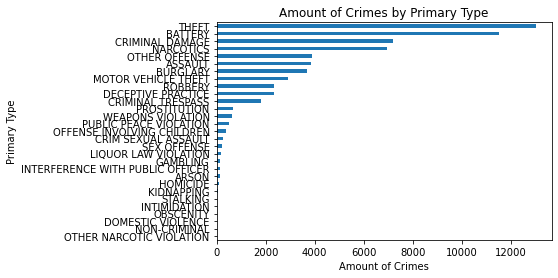

From this chart, we can see that the top four crimes in Chicago since 2001 are theft, battery, criminal damage and narcotics


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')
df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.show()

print("From this chart, we can see that the top four crimes in Chicago since 2001 are theft, battery, criminal damage and narcotics")

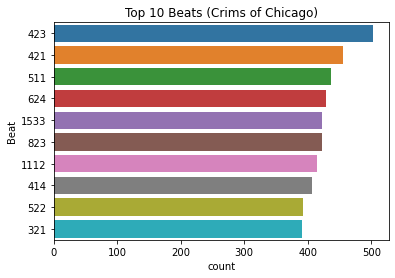

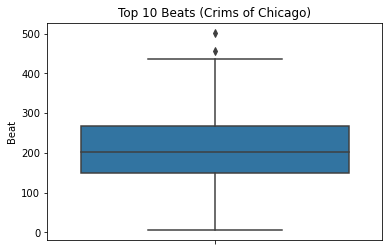

The most common BEAT was 423. A beat is a police patrol location.
This is interesting because this is where police activity is the highest.
This beat is located south of Chicago.
We are not certain if this supports our hypothesis at the moment.
Police activity may be high here because of high crime activity, student safety, or a mix of both


In [3]:
import seaborn as sns
df = pd.read_csv("Crimes_2001_to_present_sample.csv")
sns.countplot(y='Beat', data=df ,order=df['Beat'].value_counts().iloc[:10].index)
plt.title('Top 10 Beats (Crims of Chicago)')
plt.show()

sns.boxplot(y=df['Beat'].value_counts())
plt.title('Top 10 Beats (Crims of Chicago)')
plt.show()

print("The most common BEAT was 423. A beat is a police patrol location.")
print("This is interesting because this is where police activity is the highest.")
print("This beat is located south of Chicago.")
print("We are not certain if this supports our hypothesis at the moment.")
print("Police activity may be high here because of high crime activity, student safety, or a mix of both")

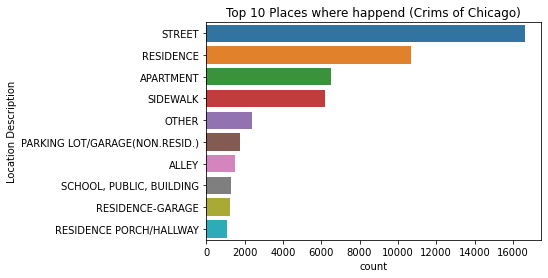

We explored the relationship between crimes and crime location. 
What we found was most crimes happened on the street. 
We believed crime happened in public more than in private places like homes. 
This shows us that domestic crimes are not the most common type of crime. 
These are crimes where there is no relationship between the victim and assaulter.


In [16]:
sns.countplot(y='Location Description', data=df, order=df['Location Description'].value_counts().iloc[:10].index)
plt.title('Top 10 Places where happend (Crims of Chicago)')
plt.show()

import plotly.express as px
import plotly.graph_objects as go

fig = px.pie(df,names="Domestic", title='Amount of Crimes by Domestic', color_discrete_sequence= px.colors.qualitative.Set2)

fig.show()


print("We explored the relationship between crimes and crime location. ")
print("What we found was most crimes happened on the street. ")
print("We believed crime happened in public more than in private places like homes. ")
print("This shows us that domestic crimes are not the most common type of crime. ")
print("These are crimes where there is no relationship between the victim and assaulter.")

In [6]:
fig = px.pie(df,names="Arrest",title='Amount of arrested cases' , color_discrete_sequence= px.colors.qualitative.Set2)

fig.show()

print("Unfortunately more than half of the criminals are never apprehended, ")
print("and we think that's one of the reasons why the crime rate in Chicago is so high.")

Unfortunately more than half of the criminals are never apprehended, 
and we think that's one of the reasons why the crime rate in Chicago is so high.


# ML analysis: clustering

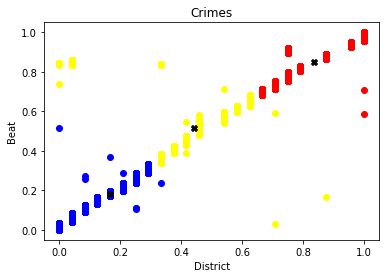

R-squared: -8.20
mean squared error for training: 0.76
mean squared error for testing: 0.84
This ML analysis is kmeans Clustering Algorithm.
This scatter plot displays the relationshipp between the Beat(the number of cops patrolling that particular area), District and Areas.
This plot shows the values of Beat, District, and Areas and the centered points are plooted on this scatter plot.
In this plot, there are more number of officers on the district numbers between 0.4 to 0.7 and the least number of officers on the district numbers between 0.2 to 0.4.
In this plot, the centered plots are plotted at [0.4596861 , 0.50048531], [0.16454835, 0.16768928], and [0.85570291, 0.86332659].
R-squared value, the mean square error for training and testing of the three columns of the dataset taht are Beat, District and Areas of the dataset are mentioned below the dataset.


In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
X_data = df[['Beat']].values
Y_data = df[['District']].values
Crime_X_train,Crime_X_test , Crime_y_train, Crime_y_test = train_test_split(X_data, Y_data, test_size = 0.20, random_state = 0)
Crime_X_train, Crime_y_train = df["Beat"].values, df["Beat"].values
Crime_X_test, Crime_y_test = df["District"].values, df["District"].values
scaler = MinMaxScaler()
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['District','Beat']])
df['Areas'] = y_predicted
scalar = MinMaxScaler()
scalar.fit(df[['Beat']])
df['Beat'] = scalar.transform(df[['Beat']])
scalar.fit(df[['District']])
df.District = scalar.transform(df[['District']])
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['District','Beat']])
centroid = km.cluster_centers_
df_1 = df[df.Areas == 0]
df_2 = df[df.Areas == 1]
df_3 = df[df.Areas == 2]

plt.scatter(df_1.District,df_1['Beat'], color = 'red')
plt.scatter(df_2.District,df_2['Beat'], color = 'blue')
plt.scatter(df_3.District,df_3['Beat'], color = 'yellow')
plt.scatter(centroid[: ,0], centroid[:, 1], marker = "X", color="black")

plt.title('Crimes')
plt.xlabel('District')
plt.ylabel('Beat')
plt.show()

#print the r-squared
print('R-squared: %.2f' % r2_score(X_data, y_predicted))
# TODO: print the mean squared error for training
print('mean squared error for training: %.2f'% mean_squared_error(Crime_X_train, y_predicted))
# TODO: print the mean squared error for testing
print('mean squared error for testing: %.2f'% mean_squared_error(Crime_X_test, y_predicted))

print("This ML analysis is kmeans Clustering Algorithm.")
print("This scatter plot displays the relationshipp between the Beat(the number of cops patrolling that particular area), District and Areas.")
print("This plot shows the values of Beat, District, and Areas and the centered points are ploted on this scatter plot.")
print("In this plot, there are more number of officers on the district numbers between 0.4 to 0.7 and the least number of officers on the district numbers between 0.2 to 0.4.")
print("In this plot, the centered plots are plotted at [0.4596861 , 0.50048531], [0.16454835, 0.16768928], and [0.85570291, 0.86332659].")
print("R-squared value, the mean square error for training and testing of the three columns of the dataset that are Beat, District and Areas of the dataset are mentioned below the dataset.")

# ML analysis: Time Series Analysis

In [18]:
df.Date = pd.to_datetime(df.Date, format='%m/%d/%Y %I:%M:%S %p')
df.index = pd.DatetimeIndex(df.Date)

df_Time = pd.DataFrame(df.resample("M").size(), columns=["Case Number"])

df_Time["Month"] = df_Time.index.month.astype(str)
df_Time["Year"] = df_Time.index.year.astype(str)
df_Time['Year Month'] = df_Time['Month']+'-'+df_Time['Year']
df_Time.head()

Case Number Month  Year Year Month
Date                                          
2001-01-31          367     1  2001     1-2001
2001-02-28          340     2  2001     2-2001
2001-03-31          394     3  2001     3-2001
2001-04-30          396     4  2001     4-2001
2001-05-31          383     5  2001     5-2001

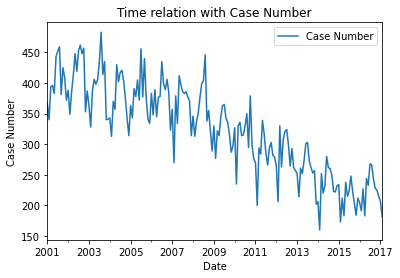

In [19]:
df_Time.plot(ylabel='Case Number')
plt.title('Time relation with Case Number')
plt.show()

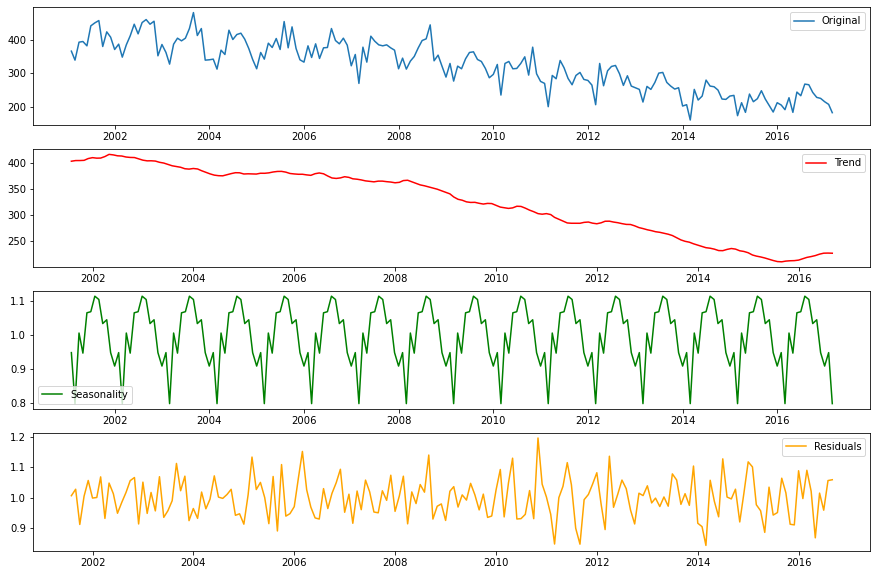

In [20]:
#Analysis trend, seasonal and residual in Data
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_mul = seasonal_decompose(df_Time["Case Number"],model='multiplicative')
decomposition_add = seasonal_decompose(df_Time["Case Number"],model='additive')

#Decomposition of time series using additive model 
trend_mul = decomposition_mul.trend
seasonal_mul = decomposition_mul.seasonal
residual_mul = decomposition_mul.resid

#Decomposition of time series using multiplicative model 
trend_add = decomposition_add.trend
seasonal_add = decomposition_add.seasonal
residual_add = decomposition_add.resid

fig, axes = plt.subplots(4, 1)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(df_Time[['Case Number']], label='Original')
axes[0].legend()

axes[1].plot(trend_mul, label='Trend', color="red")
axes[1].legend()

axes[2].plot(seasonal_mul, label='Seasonality', color='green')
axes[2].legend()

axes[3].plot(residual_mul, label='Residuals', color='orange')
axes[3].legend()

plt.show()

# ML analysis: Naive Bayes

In [21]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

df.columns = [c.replace(' ', '_') for c in df.columns]

df.Primary_Type = label.fit_transform(df.Primary_Type)
df.Location_Description = label.fit_transform(df.Location_Description)
df.Beat = label.fit_transform(df.Beat)
df.Domestic = label.fit_transform(df.Domestic)
df.Arrest = label.fit_transform(df.Arrest)

x = df[['Primary_Type','Location_Description','Beat', 'Domestic']]
y = df.Arrest

print("input:\n", x)
print("output:\n", y)

input:
                      Primary_Type  Location_Description  Beat  Domestic
Date                                                                   
2014-12-04 09:30:00             2                    14    18         1
2002-12-24 09:00:00             5                    71   183         1
2005-03-31 11:46:00            28                    90   208         0
2006-06-30 16:44:00            16                    91   134         0
2006-10-11 23:05:00            22                    94   139         0
...                           ...                   ...   ...       ...
2010-02-20 06:06:00            28                    94   220         0
2002-01-23 04:15:00             5                    83    77         0
2004-05-27 17:55:25            27                    92    99         0
2009-09-18 00:01:00            15                    94   213         0
2004-01-20 15:30:00            27                    50   267         0

[62833 rows x 4 columns]
output:
 Date
2014-12-04 09:30

# Utilizing Naive Bayes

In [22]:
# Train Test Data
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

# Applying Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(xtrain,ytrain)

ypred = gnb.predict(xtest)

# Confusion Matrix and Accuracy Score
from sklearn.metrics import confusion_matrix,accuracy_score

confMatrix = confusion_matrix(ytest,ypred)
accuScore = accuracy_score(ytest,ypred)

print("Confusion Matrix")
print(confMatrix)
print("\nAccuracyScore")
print(accuScore)

Confusion Matrix
[[8982    0]
 [3585    0]]

AccuracyScore
0.7147290522797803


# Results

<AxesSubplot:>

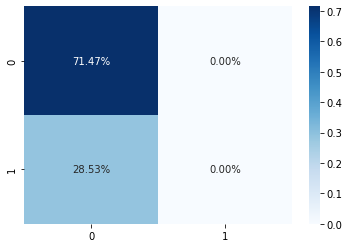

In [23]:
import seaborn as sns
import numpy as np

sns.heatmap(confMatrix/np.sum(confMatrix), annot=True, 
            fmt='.2%', cmap='Blues')

# References

https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203

https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
